In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import backend as K
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
#Load the Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

X_train = x_train/255
X_test = x_test/255

Number of training examples:  60000
Number of Classes:  10
Shape of an image:  (28, 28)
The number of occuranc of each class in the dataset =  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


Displaying some of the images with labels: 


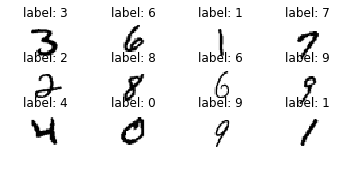

In [3]:
#Information about the dataset

print("Number of training examples: ", X_train.shape[0])
print("Number of Classes: ", len(np.unique(y_train)))
print("Shape of an image: ", X_train.shape[1:])

classes, count = np.unique(y_train, return_counts=True)
print("The number of occuranc of each class in the dataset = ", dict (zip(classes, count) ) )

print("\n")
print("Displaying some of the images with labels: ")
images_and_labels = list(zip(X_train, y_train))
for index, (image, label) in enumerate(images_and_labels[12:24]):
    plt.subplot(5,4,index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation = 'nearest')
    plt.title('label: %i' % label)

In [5]:
K.set_image_data_format('channels_last')
#Preprocessing the dataset

#as per tensorflow convention - shape = (num_samples, rows, columns, channels)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], X_test.shape[2], 1).astype('float32')
#one hot encoding the output vector
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)


In [6]:
#Building the Model

model = Sequential()

model.add(Conv2D(40, kernel_size=5, padding="same", input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(50, kernel_size=5, padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(70, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(100, kernel_size=3, padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation("softmax"))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [7]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [10]:
#Training the model
model.fit(X_train, y_train, epochs= 1 , batch_size=200, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 160s 3ms/step - loss: 0.0323 - acc: 0.9901 - val_loss: 0.0406 - val_acc: 0.9881


In [11]:
accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: ", accuracy)

Accuracy:  [0.028464009965336299, 0.99060000000000004]
